In [18]:
from sklearn.manifold import TSNE
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [8]:
df = pd.read_excel("Data/bereinigte_DATEN_ano.xlsx")

In [9]:
df.head()

,Unnamed: 0,V1,athlete,gender,run,location,date,TurnNr,MinimalRadius,VelocityAtMinRadius,...,azitonextnext,HORIZONTALGATEDISTANCE,VERTICALGATEDISTANCE,regularbs1orfs2,steepness_A,filter_$,goofy2_regular1,@2Ferse_3Zehe_4Ferse,Zehen1_Fersen2,DistanzSchätz
0,0,35,3,1,1,Zermatt,200915,2,10.63,53.6,...,341.45477,8.515579,20.414966,1,2,0,1,2,2,30.635388
1,1,36,3,1,2,Zermatt,200915,2,11.05,52.3,...,341.45477,8.515579,20.414966,1,2,0,1,2,2,30.635388
2,2,37,3,1,3,Zermatt,200915,2,10.99,52.8,...,341.45477,8.515579,20.414966,1,2,0,1,2,2,30.635388
3,3,38,3,1,4,Zermatt,200915,2,11.41,52.2,...,341.45477,8.515579,20.414966,1,2,0,1,2,2,30.635388
4,4,39,5,1,1,Zermatt,200915,2,11.31,49.7,...,341.45477,8.515579,20.414966,1,2,0,2,3,1,30.635388


In [10]:
df = df.loc[df['location'] == 'Zermatt']

In [11]:
df = df.drop(["date", "location", "Unnamed0", "vectortonext", "vector2Dtonext", "vectortonextnorm", "vector2Dtonextnorm", "projpttonext", "vectortonextnext", "vector2Dtonextnext", "vectortonextnextnorm", "vector2Dtonextnextnorm"], axis=1)

In [12]:
df.columns

Index(['Unnamed: 0', 'V1', 'athlete', 'gender', 'run', 'TurnNr',
       'MinimalRadius', 'VelocityAtMinRadius', 'VelocityAtTurnEntry',
       'VelocityAtTurnExit', 'TimeStarttoEnd', 'TimeStartToMinRad',
       'TimeMinRadToEnd', 'GlideTime_endtostart', 'TimeStarttoEnd_2',
       'Initiation', 'Completion', 'Gliding', 'GATEDISTANCE', 'dist2Dtonext',
       'STEEPNESS', 'azitonext', 'slopechangetonext', 'angletonext',
       'projtonext', 'offsettonext', 'dist3Dtonextnext', 'dts2Dtonextnext',
       'slopetonextnext', 'azitonextnext', 'HORIZONTALGATEDISTANCE',
       'VERTICALGATEDISTANCE', 'regularbs1orfs2', 'steepness_A', 'filter_$',
       'goofy2_regular1', '@2Ferse_3Zehe_4Ferse', 'Zehen1_Fersen2',
       'DistanzSchätz'],
      dtype='object')

In [13]:
features = df.columns[4:17]

In [14]:
print(features)

Index(['run', 'TurnNr', 'MinimalRadius', 'VelocityAtMinRadius',
       'VelocityAtTurnEntry', 'VelocityAtTurnExit', 'TimeStarttoEnd',
       'TimeStartToMinRad', 'TimeMinRadToEnd', 'GlideTime_endtostart',
       'TimeStarttoEnd_2', 'Initiation', 'Completion'],
      dtype='object')


In [20]:
# distribute the dataset into two components X and Y
x = df.iloc[:, 4:17]
y = df.iloc[:, 2]

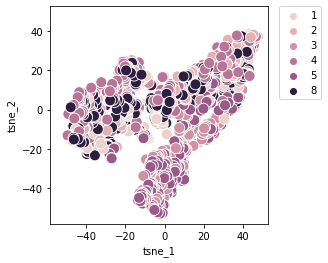

In [21]:
# We want to get TSNE embedding with 2 dimensions
n_components = 2
tsne = TSNE(n_components)
tsne_result = tsne.fit_transform(x)
tsne_result.shape
# (1000, 2)
# Two dimensions for each of our images
 
# Plot the result of our TSNE with the label color coded
# A lot of the stuff here is about making the plot look pretty and not TSNE
tsne_result_df = pd.DataFrame({'tsne_1': tsne_result[:,0], 'tsne_2': tsne_result[:,1], 'label': y})
fig, ax = plt.subplots(1)
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_result_df, ax=ax,s=120)
lim = (tsne_result.min()-5, tsne_result.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)